In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
p= r"G:\project\NHTS Data 2017 Household repo folder\nhts-2017-hh\hhpub.csv"
df=pd.read_csv(p)

In [5]:
per= r"G:\project\NHTS Data 2017 Household repo folder\nhts-2017-hh\perpub.csv"
df_per=pd.read_csv(per)

In [6]:
df_PLACE= df[(df['PLACE'] == 1) | (df['PLACE'] == 2)] 
df_PLACE_D= df[(df['PLACE'] == 4) | (df['PLACE'] == 5)] 
df_PLACE_ALL= (df[(df['PLACE'] == 4) | (df['PLACE'] == 5) | (df['PLACE'] == 1) | (df['PLACE'] == 2)] )

In [5]:
df_merge=pd.merge(df,df_per, how='inner')

In [6]:
df_merge.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,BIKE_DFR,BIKE_GKP,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDTAX,WTPERFIN
0,30000007,2,3,1,3,5,7,2,1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,206.690153
1,30000007,2,3,1,3,5,7,2,1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,197.075742
2,30000007,2,3,1,3,5,7,2,1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,219.514210
3,30000008,5,2,1,2,4,8,1,1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,63.185911
4,30000008,5,2,1,2,4,8,1,1,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,58.665911


In [7]:
df_merge_PLACE= df[(df_merge['PLACE'] == 1) | (df_merge['PLACE'] == 2)] 
len(df_merge_PLACE) 

<ipython-input-7-fe9ad10752a3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merge_PLACE= df[(df_merge['PLACE'] == 1) | (df_merge['PLACE'] == 2)]


49588

In [8]:
df_merge_PLACE= df[(df_merge['PLACE'] == 1) | (df_merge['PLACE'] == 2)] 
df_merge_PLACE_D= df[(df_merge['PLACE'] == 4) | (df_merge['PLACE'] == 5)] 
df_merge_PLACE_ALL= (df[(df_merge['PLACE'] == 4) | (df_merge['PLACE'] == 5) | (df_merge['PLACE'] == 1) | (df_merge['PLACE'] == 2)] )
len(df_merge_PLACE), len(df_merge_PLACE_D), len(df_merge_PLACE_ALL)

<ipython-input-8-ef1969beeb3d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merge_PLACE= df[(df_merge['PLACE'] == 1) | (df_merge['PLACE'] == 2)]
<ipython-input-8-ef1969beeb3d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merge_PLACE_D= df[(df_merge['PLACE'] == 4) | (df_merge['PLACE'] == 5)]
<ipython-input-8-ef1969beeb3d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merge_PLACE_ALL= (df[(df_merge['PLACE'] == 4) | (df_merge['PLACE'] == 5) | (df_merge['PLACE'] == 1) | (df_merge['PLACE'] == 2)] )


(49588, 33722, 83310)

In [9]:
len(df_PLACE), len(df_PLACE_D), len(df_PLACE_ALL)

(47825, 34781, 82606)

In [10]:
df_merge_PLACE_ALL['BURDEN'] = np.where(((df_merge_PLACE_ALL['PLACE'] == 1) | (df_merge_PLACE_ALL['PLACE'] == 2)), 'Burden', 'Not Burden')
df_merge_PLACE_ALL.head()

<ipython-input-10-fb15f3595794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_PLACE_ALL['BURDEN'] = np.where(((df_merge_PLACE_ALL['PLACE'] == 1) | (df_merge_PLACE_ALL['PLACE'] == 2)), 'Burden', 'Not Burden')


,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,BURDEN
0,30000007,2,3,1,3,5,7,2,1,2,...,187.314320,T,50,1500,750,750,20,750,300,Burden
1,30000008,5,2,1,2,4,8,1,1,2,...,69.513032,R,5,300,300,150,5,300,300,Burden
2,30000012,5,3,1,1,2,10,1,1,3,...,79.419586,C,80,17000,17000,5000,60,17000,7000,Burden
3,30000019,5,3,1,2,2,3,1,5,5,...,279.143588,S,40,300,300,150,50,750,300,Not Burden
4,30000029,3,3,1,2,2,5,2,5,1,...,103.240304,S,40,1500,750,750,40,1500,750,Burden


In [7]:
df_PLACE_ALL['BURDEN'] = np.where(((df_PLACE_ALL['PLACE'] == 1) | (df_PLACE_ALL['PLACE'] == 2)), 'Burden', 'Not Burden')
df_PLACE_ALL.head()

<ipython-input-7-ddd41bbd4959>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PLACE_ALL['BURDEN'] = np.where(((df_PLACE_ALL['PLACE'] == 1) | (df_PLACE_ALL['PLACE'] == 2)), 'Burden', 'Not Burden')


,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,BURDEN
0,30000007,2,3,1,3,5,7,2,1,2,...,187.314320,T,50,1500,750,750,20,750,300,Burden
1,30000008,5,2,1,2,4,8,1,1,2,...,69.513032,R,5,300,300,150,5,300,300,Burden
2,30000012,5,3,1,1,2,10,1,1,3,...,79.419586,C,80,17000,17000,5000,60,17000,7000,Burden
4,30000029,3,3,1,2,2,5,2,5,1,...,103.240304,S,40,1500,750,750,40,1500,750,Burden
6,30000041,4,3,1,2,2,11,1,1,1,...,788.614240,T,40,300,50,25,40,300,300,Not Burden


In [5]:
len(df), len(df_PLACE), len(df_PLACE_D), len(df_PLACE_ALL)

(129696, 47825, 34781, 82606)

<AxesSubplot:xlabel='HHSIZE'>

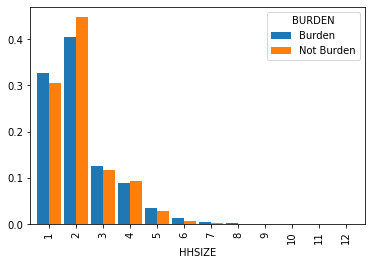

In [8]:
df_PLACE_ALL.groupby('BURDEN').HHSIZE.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='WALK2SAVE'>

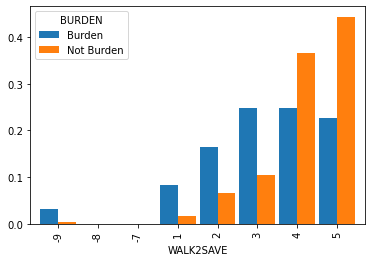

In [9]:
df_PLACE_ALL.groupby('BURDEN').WALK2SAVE.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

In [ ]:
df_merge_PLACE_ALL.groupby('BURDEN').HHSIZE.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='WEBUSE17'>

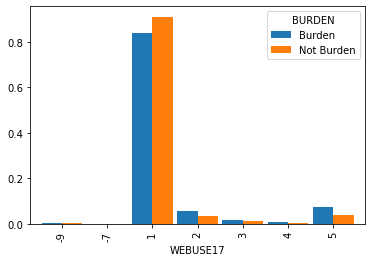

In [10]:
df_PLACE_ALL.groupby('BURDEN').WEBUSE17.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='BUS'>

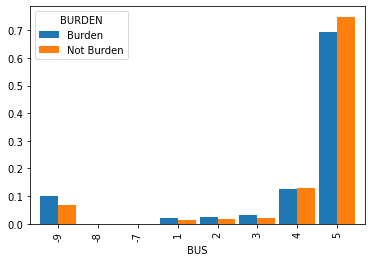

In [12]:
df_PLACE_ALL.groupby('BURDEN').BUS.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='BIKE2SAVE'>

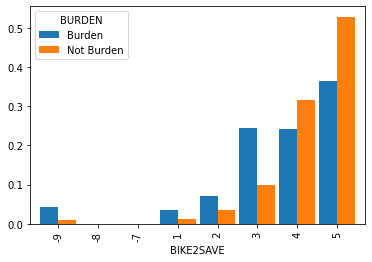

In [11]:
df_PLACE_ALL.groupby('BURDEN').BIKE2SAVE.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

Markdown

### here -9 is not ascertained, 12 agree, 45 disagree, 3 neither agree/disagree
### we can see that those who don't think that travel is a burden, also don't think this bicycle can be used to releive them from this burden
### on the contrary, we can see that those who think that travel is a burden, also think this bicycle can be used to releive them from this burden. 
### Moreover, Burden people are not opinionated about this mode of travel, they are the population with most ambiguity and we can see that Not BURDEN people are more opinionated
### the accessibility question not answered
### selling  bikes would be easier to those who are financially constrained for travel

<AxesSubplot:xlabel='HH_RACE'>

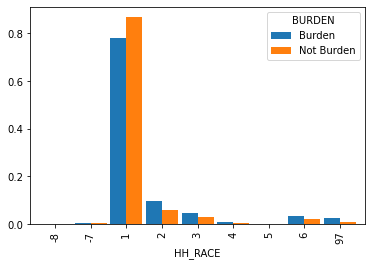

In [17]:
df_PLACE_ALL.groupby('BURDEN').HH_RACE.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='TAXI'>

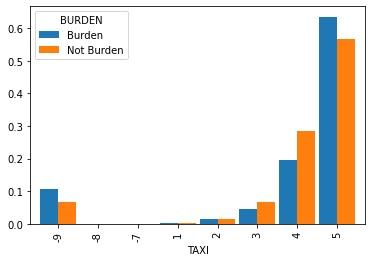

In [18]:
df_PLACE_ALL.groupby('BURDEN').TAXI.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='TRAIN'>

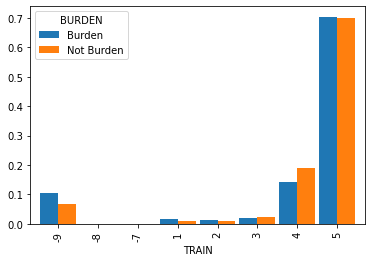

In [19]:
df_PLACE_ALL.groupby('BURDEN').TRAIN.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='YOUNGCHILD'>

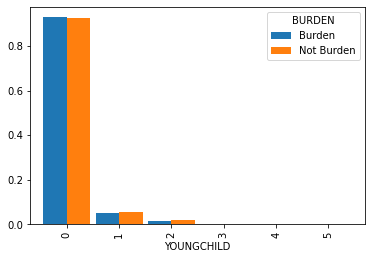

In [21]:
df_PLACE_ALL.groupby('BURDEN').YOUNGCHILD.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='NUMADLT'>

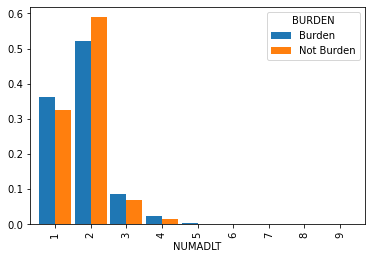

In [22]:
df_PLACE_ALL.groupby('BURDEN').NUMADLT.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='HOMEOWN'>

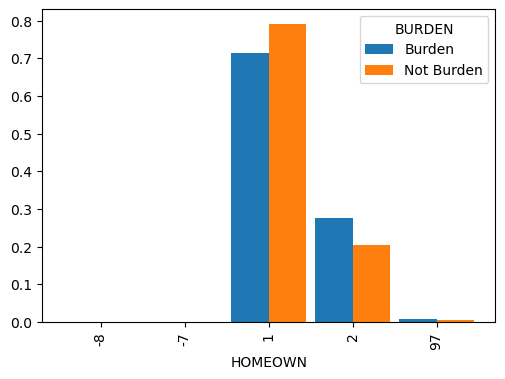

In [32]:
df_PLACE_ALL.groupby('BURDEN').HOMEOWN.value_counts(normalize=True).unstack(0).plot.bar(width = .90)

<AxesSubplot:xlabel='HHSTFIPS'>

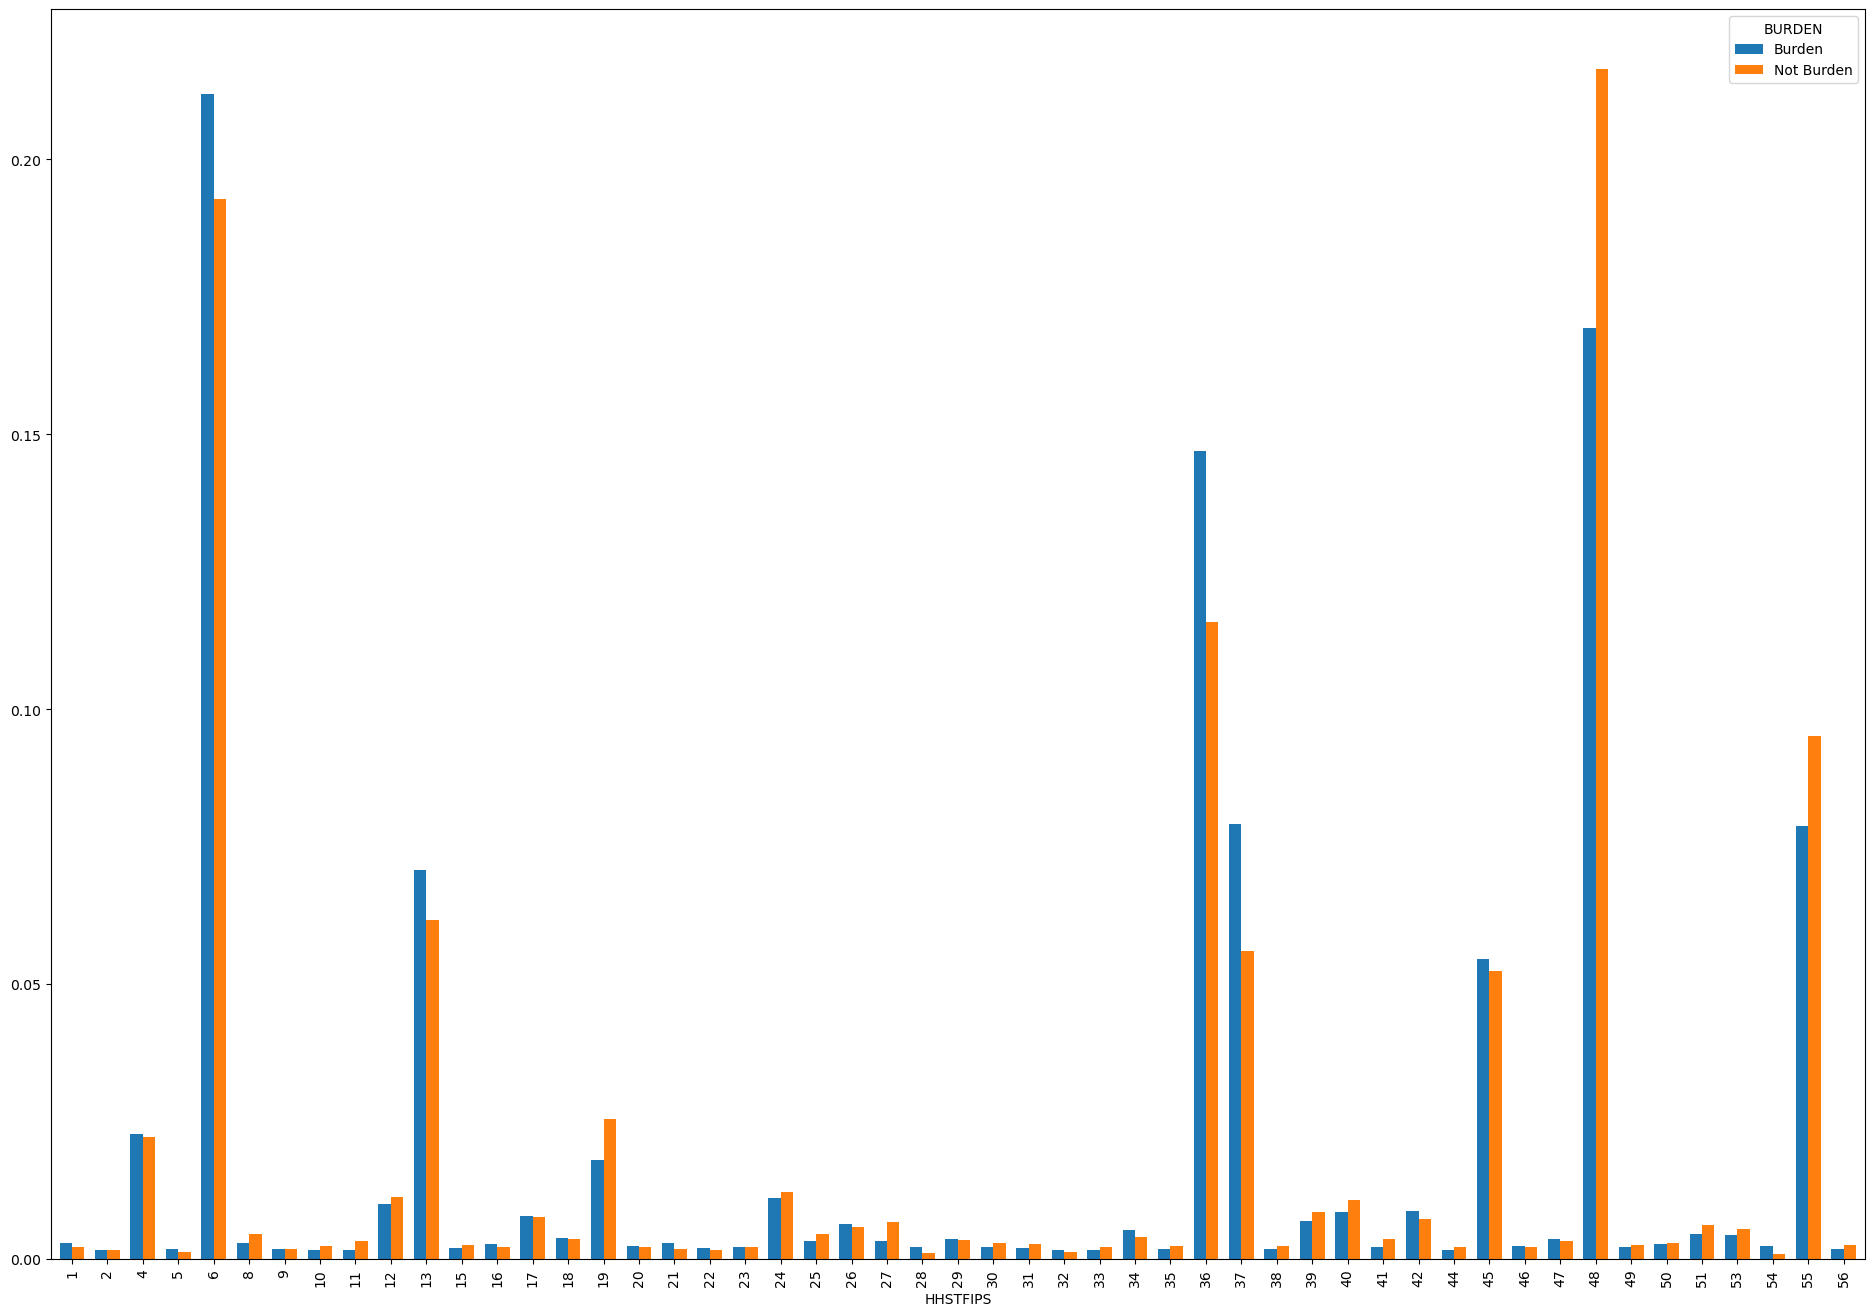

In [35]:
plt.rc('figure', figsize=[46.82 * .5**(.5 * 2), 33.11 * .5**(.5 * 2)], dpi=100)
df_PLACE_ALL.groupby('BURDEN').HHSTFIPS.value_counts(normalize=True).unstack(0).plot.bar(width = .70)

BIKE_DFR	Reason for Not Biking More: Infrastructure

In [30]:
plt.rc('figure', figsize=[46.82 * .5**(.5 * 6), 33.11 * .5**(.5 * 6)], dpi=100)

## codebook link 
https://nhts.ornl.gov/tables09/CodebookBrowser.aspx

## Travel is a Financial Burden is it because of poverty or poor access to daily needs
### if poverty, then the distribution among middle class will be normal
### if inaccessibility is the cause, then middle class will consider it as a burden
#### WEBUSE17

## var name PLACE
https://nhts.ornl.gov/tables09/CodebookPage.aspx?id=1287
#Travel is a Financial Burden

In [7]:
df_PLACE= df[(df['PLACE'] == 1) | (df['PLACE'] == 2)] 

In [8]:
df_PLACE_D= df[(df['PLACE'] == 4) | (df['PLACE'] == 5)] 

In [9]:
df_PLACE_ALL= (df[(df['PLACE'] == 4) | (df['PLACE'] == 5) | (df['PLACE'] == 1) | (df['PLACE'] == 2)] )

In [10]:
import numpy as np
df_PLACE_ALL['BURDEN'] = np.where(((df_PLACE_ALL['PLACE'] == 1) | (df_PLACE_ALL['PLACE'] == 2)), 'Burden', 'Not Burden')
df_PLACE_ALL.head()

<ipython-input-10-d81ef5bf657d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PLACE_ALL['BURDEN'] = np.where(((df_PLACE_ALL['PLACE'] == 1) | (df_PLACE_ALL['PLACE'] == 2)), 'Burden', 'Not Burden')


,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,BURDEN
0,30000007,2,3,1,3,5,7,2,1,2,...,187.314320,T,50,1500,750,750,20,750,300,Burden
1,30000008,5,2,1,2,4,8,1,1,2,...,69.513032,R,5,300,300,150,5,300,300,Burden
2,30000012,5,3,1,1,2,10,1,1,3,...,79.419586,C,80,17000,17000,5000,60,17000,7000,Burden
4,30000029,3,3,1,2,2,5,2,5,1,...,103.240304,S,40,1500,750,750,40,1500,750,Burden
6,30000041,4,3,1,2,2,11,1,1,1,...,788.614240,T,40,300,50,25,40,300,300,Not Burden


In [11]:
len(df), len(df_PLACE), len(df_PLACE_D), len(df_PLACE_ALL)

(129696, 47825, 34781, 82606)

In [ ]:
df_PLACE_ALL.groupby('BURDEN').HHSIZE.value_counts(normalize=True).unstack(0).plot.bar()

In [ ]:
df_PLACE.head(20)

In [ ]:
df_PLACE.columns.values

## var nameTRAVDAY
https://nhts.ornl.gov/tables09/CodebookPage.aspx?id=1328 Travel day - day of week
1- Sunday ~ 7- Saturday

In [ ]:
df_PLACE.TRAVDAY.value_counts()

In [ ]:
df_PLACE_D.TRAVDAY.value_counts()

In [ ]:
df.TRAVDAY.value_counts()

In [ ]:
## for name, values in df.iteritems():
   ## print('{name}: {value}'.format(name=name, value=values[:])) 

In [ ]:
df.BUS.value_counts()

In [ ]:
df_PLACE.BUS.value_counts()

In [ ]:
df_PLACE_D.BUS.value_counts()

In [ ]:
plt.scatter(df['PLACE'], df['BUS'])
plt.show()

In [ ]:
plt.scatter(df_PLACE['PLACE'], df_PLACE['BUS'])
plt.show()

# BIKE2SAVE 
https://nhts.ornl.gov/tables09/CodebookPage.aspx?id=1178 # Bicycle to Reduce Financial Burden of Travel 

In [ ]:
df_PLACE.BIKE2SAVE.value_counts()

In [ ]:
df.BIKE2SAVE.value_counts()